In [1]:
from pylab import *
from scipy.signal import convolve2d
%matplotlib inline
import numpy.random

These are the images we will consider:

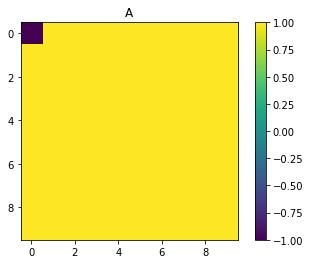

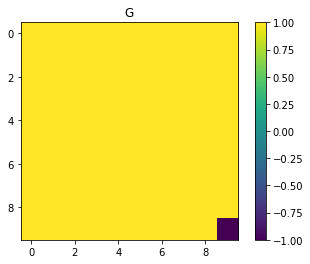

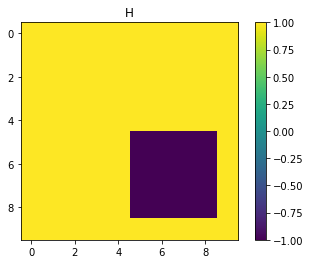

<Figure size 432x288 with 0 Axes>

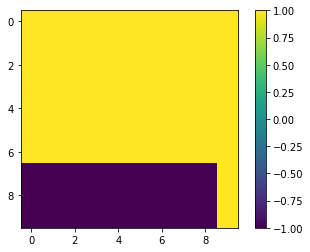

In [120]:
A=zeros((10,10))+1
A[:1,0:1]=-1
imshow(A)
title("A")
colorbar()
figure()
G=zeros((10,10))+1;
G[-1:,-1:]=-1
title("G")
imshow(G)
colorbar()
figure()
title("H")
H=zeros((10,10))+1
H[5:9,5:9]=-1;
imshow(H)
colorbar()
figure()
I=zeros((10,10))+1
I[7:10,0:9]=-1;
figure()
imshow(I)
colorbar()

#J=(J+G)/2

I run the dynamics 
$$
\mathbf{n}(t+1)=\Theta\left[\mathbf{n}\mathcal{J}+T\mathbf{z}-\theta \right]
$$
Given $P$ patterns $\lbrace \pmb{\xi}^1,\dots, \pmb{\xi}^P \rbrace$
$$
J_{i,j}=\frac{1}{P}\sum_{\mu=1}^P\xi_i^\mu\xi_j^\mu
$$

In [121]:
numpy.random.seed()
def dynamics(n, T, J, theta, N1):
    N_iterations = 10
    
    t = 1
    traj=[]
    traj+=[n]
    while t < N_iterations:
        z = numpy.random.logistic(0, T / 2, (1, N1))
        # z=numpy.random.normal(0,T,(1,N1))
        a = dot(n, J) - z - theta
        n = where(a > 0, 1, 0)[0]
        t += 1
        traj+=[n]
    return traj

def dynamics_spin(n, T, J, theta, N1):
    N_iterations = 10
    
    t = 1
    traj=[]
    traj+=[n]
    while t < N_iterations:
        z = numpy.random.logistic(0, T / 2, (1, N1))
        # z=numpy.random.normal(0,T,(1,N1))
        a = dot(n, J) - z - theta
        n = where(a > 0, 1, -1)[0]
        t += 1
        traj+=[n]
    return traj


(10, 100)

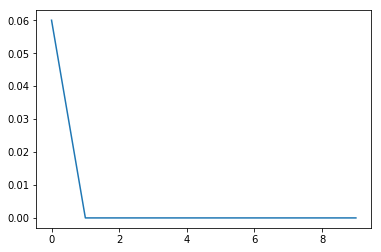

In [38]:
plot(mean(trj,axis=1))
shape(trj)


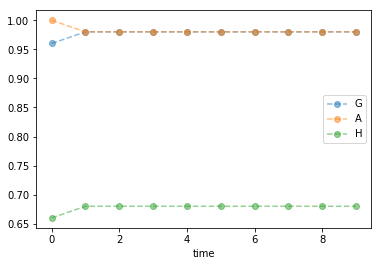

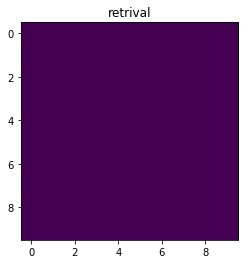

In [153]:

xi_1=G.flatten()
xi_2=A.flatten()
xi_3=H.flatten()
pattern_list=[xi_1,xi_2,xi_3]
J=transpose(pattern_list)@pattern_list/len(pattern_list)
C=corrcoef(pattern_list)
#J=transpose(pattern_list)@C@pattern_list/len(pattern_list)
N=len(G)**2
n=xi_2#where(rand(N)>0.5,1,-1)#
trj=dynamics_spin(n,0,J,0,N)
plot(arange(len(trj)),transpose([dot(trj,el)/N for el in pattern_list]),"--o",alpha=0.5)
legend(["G","A","H"])
xlabel("time")
figure()
title("retrival")
imshow(reshape(trj[-1],(10,10)))

In [59]:
S=2*(rand(10,10)>0.5)-1 # matrix of spin
J*S
i=3;j=4;
print(S)
effective_field=S*J
print(effective_field[i,j]*(sum(effective_field)-effective_field[i,j]))


[[-1 -1  1 -1  1 -1 -1  1  1  1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1  1  1 -1  1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1  1  1  1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1  1 -1  1 -1]
 [-1 -1 -1 -1  1 -1  1  1 -1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1  1 -1]]
21.0


In [45]:
import scipy
scipy.special.erf(1/sqrt(2))

0.68268949213708585

In [49]:
(1-0.5*(1-scipy.special.erf(sqrt(100/4)/sqrt(2))))**100

0.99997133524955206

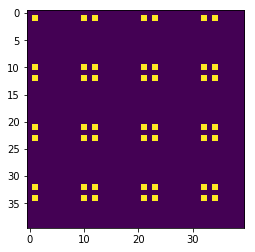

In [44]:
N1=int(sqrt(N))
a=(diag(ones(N1),1)[:N1,:N1]+diag(ones(N1),-1)[:N1,:N1]).flatten()
A=outer(a,a)
imshow(A[:40,:40])

#### Usual Ising dynamics

In [ ]:
N=100
n=where(rand(N)>0.9,1,0)
J=diag(ones(N),-1)[:N,:N]+diag(ones(N),1)[:N,:N]
trj=dynamics(n,0.,J,1,N)

In [46]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
shape(A)

(100, 100)

In [50]:
A[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])